In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8,4

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Walmart Sales Project/data/Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.shape

(6435, 8)

In [5]:
df.isnull().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y") #Convert the type of Date to datetime

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
df2 = df.filter(['Date', 'Weekly_Sales'])
df2.head()

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68


In [ ]:
df2 = df2.groupby('Date').sum()

In [ ]:
df2.to_csv('/content/gdrive/MyDrive/Walmart Sales Project/data/ts_ARIMA_Walmart.csv')

##Convert into Time Series

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('/content/gdrive/MyDrive/Walmart Sales Project/data/ts_ARIMA_Walmart.csv', parse_dates=['Date'], 
                   index_col='Date',date_parser=dateparse)
print ('\n Parsed Data:')
print (data.head())


 Parsed Data:
            Weekly_Sales
Date                    
2010-02-05   49750740.50
2010-02-12   48336677.63
2010-02-19   48276993.78
2010-02-26   43968571.13
2010-03-05   46871470.30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [4]:
#Convert to timeseries
ts = data['Weekly_Sales']
ts.head(5)

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
Name: Weekly_Sales, dtype: float64

In [5]:
from datetime import datetime
ts[datetime(2010,2,5)]

49750740.5

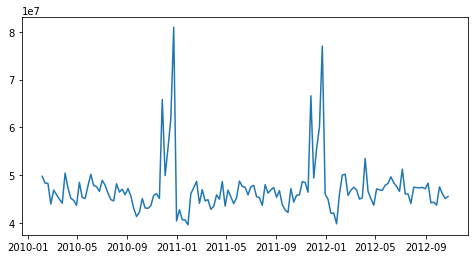

In [6]:
plt.plot(ts)

## Stationarity Check

In [7]:
#STATIONARITY CHECK

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


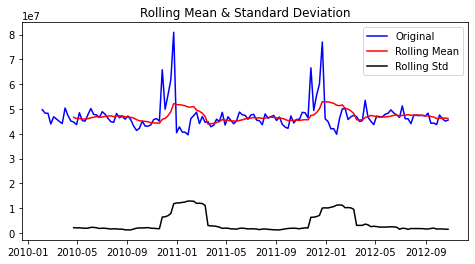

Results of Dickey-Fuller Test:
Test Statistic                -5.908298e+00
p-value                        2.675979e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [8]:
test_stationarity(ts)

In [ ]:
#p-value < 0.05 
#stationary

##Log Transformation


In [9]:
ts_log = np.log(ts)
ts_log.head(5)

Date
2010-02-05    17.722536
2010-02-12    17.693701
2010-02-19    17.692466
2010-02-26    17.598986
2010-03-05    17.662920
Name: Weekly_Sales, dtype: float64

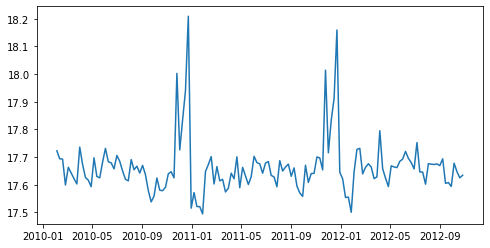

In [10]:
plt.plot(ts_log)

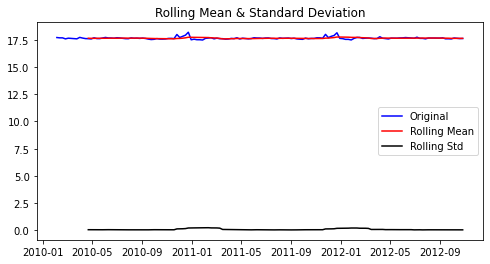

Results of Dickey-Fuller Test:
Test Statistic                -6.332826e+00
p-value                        2.878283e-08
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [11]:
test_stationarity(ts_log)

##Decomposition

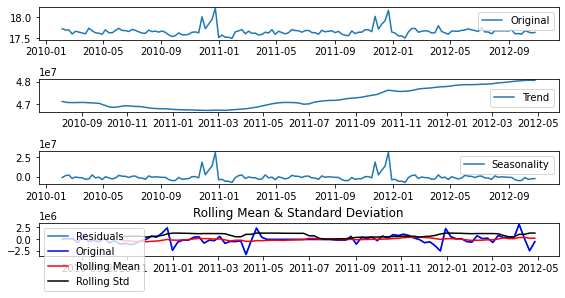

Results of Dickey-Fuller Test:
Test Statistic                -6.956922e+00
p-value                        9.377200e-10
#Lags Used                     1.000000e+00
Number of Observations Used    8.900000e+01
Critical Value (1%)           -3.506057e+00
Critical Value (5%)           -2.894607e+00
Critical Value (10%)          -2.584410e+00
dtype: float64


In [12]:
#DECOMPOSITION
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

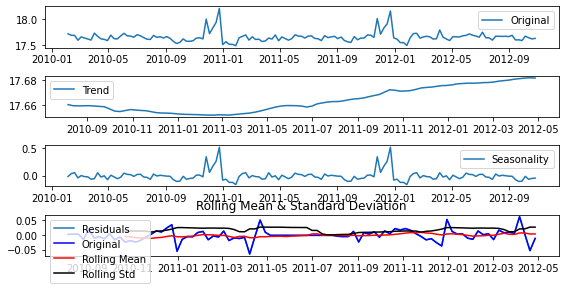

Results of Dickey-Fuller Test:
Test Statistic                -6.824472e+00
p-value                        1.963835e-09
#Lags Used                     1.000000e+00
Number of Observations Used    8.900000e+01
Critical Value (1%)           -3.506057e+00
Critical Value (5%)           -2.894607e+00
Critical Value (10%)          -2.584410e+00
dtype: float64


In [13]:
#DECOMPOSITION
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

##ARIMA Model

In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [15]:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log, nlags=20)
lag_pacf = pacf(ts_log, nlags=20, method='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

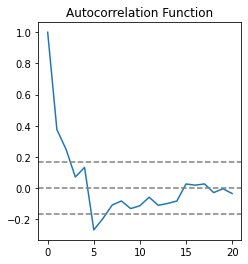

In [16]:
#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

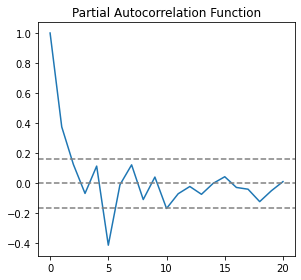

In [18]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [19]:
ts_values=ts_log.values

X = ts_values
size = int(len(X) * 0.667)
train, test = X[0:size], X[size:len(X)]

In [20]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

#Best ARIMA p,d,q (1,0,2) 

In [21]:
history = [x for x in train] #define the list variable
predictions = list()
#test.reset_index()
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(1,0,2)) #parsing training record #order=(p,d,q)
        model_fit = model.fit(disp=0) 
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]   #keep on adding observing record for training data
        history.append(obs)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)   
rmse = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % rmse)


from math import sqrt
rms = sqrt(mean_squared_error(test, predictions))

predicted=17.766042, expected=17.715270
predicted=17.729126, expected=17.832995
predicted=17.724803, expected=17.911282
predicted=17.768544, expected=18.159293
predicted=17.914573, expected=17.645075
predicted=17.781687, expected=17.621182
predicted=17.659859, expected=17.553730
predicted=17.617938, expected=17.555107
predicted=17.611194, expected=17.500256
predicted=17.591655, expected=17.646011
predicted=17.633669, expected=17.727722
predicted=17.684121, expected=17.731467
predicted=17.697716, expected=17.639172
predicted=17.664577, expected=17.662697
predicted=17.659163, expected=17.675829
predicted=17.666961, expected=17.663560
predicted=17.665482, expected=17.622035
predicted=17.649451, expected=17.628218
predicted=17.645702, expected=17.795235
predicted=17.703956, expected=17.657739
predicted=17.679689, expected=17.623784
predicted=17.650006, expected=17.593243
predicted=17.633689, expected=17.668297
predicted=17.656352, expected=17.664080
predicted=17.664689, expected=17.661905


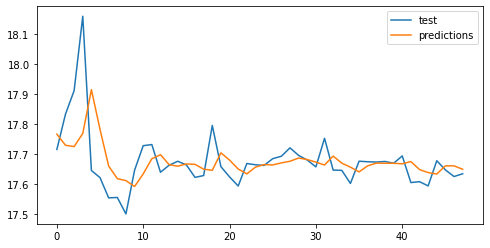

In [22]:
pyplot.plot(test, label='test')   
pyplot.plot(predictions, label='predictions')
plt.legend(loc = 'Right corner')
pyplot.show()

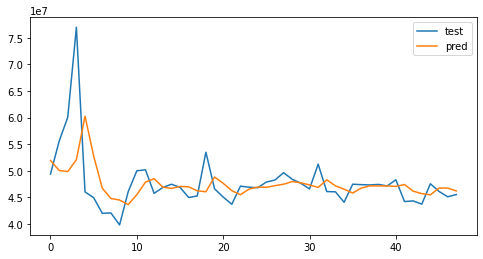

In [23]:
pyplot.plot(np.exp(test), label='test')   
pyplot.plot(np.exp(predictions), label='pred')
plt.legend(loc = 'Right corner')
pyplot.show()

In [24]:
from math import sqrt
rms = sqrt(mean_squared_error(np.exp(test), np.exp(predictions)))
print('Root Mean Squarred Error: %.2f'% rms)

Root Mean Squarred Error: 5136942.16


#Find best ARIMA order

In [ ]:
import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.8)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [ ]:
import datetime
print(datetime.datetime.now())

p_values = [1,2,3,4]
q_values = [1,2,3]
d_values = [0,1]

warnings.filterwarnings("ignore")
evaluate_models(train, p_values, d_values, q_values)
print(datetime.datetime.now())

2022-05-25 09:26:47.046067
ARIMA(1, 0, 1) MSE=0.008
ARIMA(1, 0, 2) MSE=0.008
ARIMA(1, 1, 1) MSE=0.009
ARIMA(2, 0, 1) MSE=0.009
ARIMA(2, 0, 2) MSE=0.010
ARIMA(2, 0, 3) MSE=0.009
ARIMA(2, 1, 1) MSE=0.008
ARIMA(2, 1, 2) MSE=0.009
ARIMA(3, 0, 1) MSE=0.009
ARIMA(3, 0, 3) MSE=0.009
ARIMA(3, 1, 1) MSE=0.009
ARIMA(3, 1, 2) MSE=0.009
ARIMA(3, 1, 3) MSE=0.011
ARIMA(4, 0, 1) MSE=0.009
ARIMA(4, 0, 2) MSE=0.009
ARIMA(4, 0, 3) MSE=0.009
ARIMA(4, 1, 1) MSE=0.009
ARIMA(4, 1, 2) MSE=0.009
ARIMA(4, 1, 3) MSE=0.010
Best ARIMA(1, 0, 2) MSE=0.008
2022-05-25 09:29:28.631778


In [106]:
forecast = model_fit.forecast(steps = 7)[0]

In [107]:
forecast

array([17.64907994, 17.65382159, 17.65849579, 17.660801  , 17.66193788,
       17.66249856, 17.66277507])

In [108]:
final_forecast = np.exp(forecast)
final_forecast

array([46227246.90465569, 46446960.57087345, 46664571.30468088,
       46772266.98540916, 46825471.48507541, 46851732.99404509,
       46864689.98568165])